In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_miss = pd.read_csv('Datasets/pima_indians_diabetes_miss.csv')
df_miss

,pregs,plas,pres,skin,test,BMI,pedi,Age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,NaN,NaN
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,NaN,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [3]:
valid_indices = df_miss['pregs'].dropna().index[:2]
df_miss.loc[valid_indices, 'pregs'] = "na"

 
df_miss.replace("na", pd.NA, inplace=True)
 
missing_values_per_column = df_miss.isnull().sum()
total_missing_values = df_miss.isnull().sum().sum()

print("Updated number of missing values in each attribute:")
print(missing_values_per_column)

print("\nUpdated total number of missing values in the file:", total_missing_values)

Updated number of missing values in each attribute:
pregs    19
plas     33
pres     35
skin     45
test     41
BMI      42
pedi     19
Age      31
class    29
dtype: int64

Updated total number of missing values in the file: 294


C:\Users\Teja\AppData\Local\Temp\ipykernel_23516\33931220.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'na' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_miss.loc[valid_indices, 'pregs'] = "na"


In [4]:
df_miss.loc[df_miss['pedi'].first_valid_index(), 'pedi'] = None
df_miss.loc[df_miss['pedi'].last_valid_index(), 'pedi'] = None


temperature_valid_indices = df_miss['pedi'].dropna().index[:2]
df_miss.loc[temperature_valid_indices, 'pedi'] = "N/A"


df_miss.replace("N/A", pd.NA, inplace=True)


missing_values_per_column = df_miss.isnull().sum()
total_missing_values = df_miss.isnull().sum().sum()


print("Updated number of missing values in each attribute:")
print(missing_values_per_column)

print("\nUpdated total number of missing values in the file:", total_missing_values)


df_miss.to_csv('pima_indians_diabetes_miss-COPY.csv', index=False)

Updated number of missing values in each attribute:
pregs    19
plas     33
pres     35
skin     45
test     41
BMI      42
pedi     23
Age      31
class    29
dtype: int64

Updated total number of missing values in the file: 298


C:\Users\Teja\AppData\Local\Temp\ipykernel_23516\1238170842.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_miss.loc[temperature_valid_indices, 'pedi'] = "N/A"


Number of tuples with specific missing values:
0    648
1     67
2     14
3     17
5      5
6      3
7      7
8      3
9      4
Name: count, dtype: int64


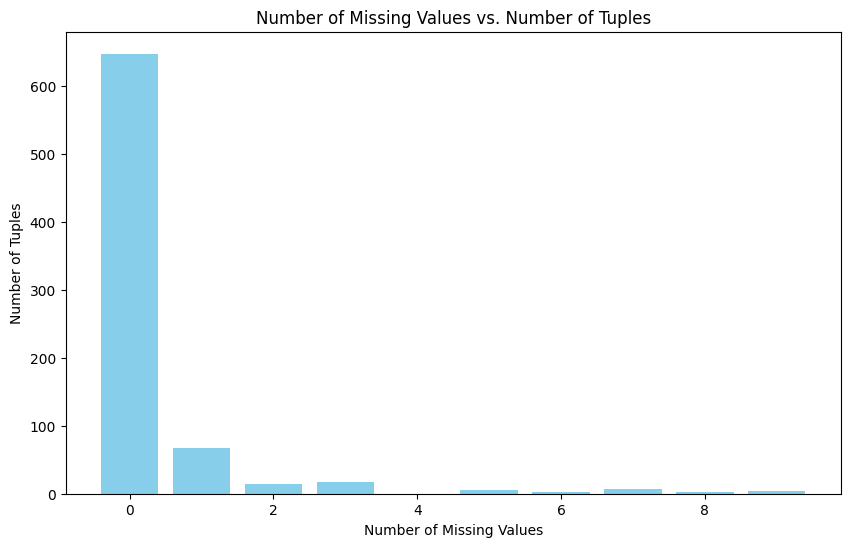

In [5]:
missing_counts = df_miss.isnull().sum(axis=1)


missing_value_distribution = missing_counts.value_counts().sort_index()

print("Number of tuples with specific missing values:")
print(missing_value_distribution)


plt.figure(figsize=(10, 6))
plt.bar(missing_value_distribution.index, missing_value_distribution.values, color='skyblue')
plt.xlabel('Number of Missing Values')
plt.ylabel('Number of Tuples')
plt.title('Number of Missing Values vs. Number of Tuples')
# plt.xticks(range(missing_value_distribution.index.min(), missing_value_distribution.index.max() + 1))
plt.show()

In [6]:
threshold = len(df_miss.columns) / 2

tuples_with_high_missing = (missing_counts >= threshold).sum()
print(f"Number of tuples with >=50% of attributes missing: {tuples_with_high_missing}")

Number of tuples with >=50% of attributes missing: 22


In [7]:
df_cleaned = df_miss[missing_counts < threshold]
print(f"After dropping tuples with >=50% missing values, the dataset has {len(df_cleaned)} rows.")

After dropping tuples with >=50% missing values, the dataset has 746 rows.


In [8]:
df_target_cleaned = df_cleaned.dropna(subset=['class'])
print(f"After dropping tuples with missing 'quality' attribute, the dataset has {len(df_target_cleaned)} rows.")

After dropping tuples with missing 'quality' attribute, the dataset has 723 rows.


In [9]:
df_cleaned.to_csv('pima_indians_diabetes_cleaned.csv', index=False)
df_target_cleaned.to_csv('pima_indians_diabetes_target_cleaned.csv', index=False)

In [10]:
numeric_columns = df_target_cleaned.select_dtypes(include=['number']).columns
medians = df_target_cleaned[numeric_columns].median()

df_filled_median = df_target_cleaned.copy()
df_filled_median[numeric_columns] = df_filled_median[numeric_columns].fillna(medians)
print("Missing values replaced by the median of their respective attributes.")
print(df_filled_median.head())
print("\nNumber of missing values in each attribute after replacement:")
print(df_filled_median.isnull().sum())

Missing values replaced by the median of their respective attributes.
  pregs   plas  pres  skin   test   BMI   pedi   Age  class
0  <NA>  148.0  72.0  35.0    0.0  33.6    NaN  50.0    1.0
2   8.0  183.0  64.0   0.0    0.0  23.3   <NA>  32.0    1.0
3   1.0   89.0  66.0  23.0   94.0  28.1  0.167  29.0    0.0
4   0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0    1.0
5   5.0  116.0  74.0   0.0    0.0  25.6  0.201  30.0    0.0

Number of missing values in each attribute after replacement:
pregs    1
plas     0
pres     0
skin     0
test     0
BMI      0
pedi     5
Age      0
class    0
dtype: int64


In [11]:
df_original = pd.read_csv("pima_indians_diabetes_original.csv")
df_processed = df_filled_median

original_stats = df_original.describe().transpose()
original_stats['Mode'] = df_original.mode().iloc[0]

processed_stats = df_processed.describe().transpose()
processed_stats['Mode'] = df_processed.mode().iloc[0]

comparison = original_stats[['mean', '50%', 'std', 'Mode']].copy()
comparison.columns = ['Original Mean', 'Original Median', 'Original Std', 'Original Mode']

processed_comparison = processed_stats[['mean', '50%', 'std', 'Mode']].copy()
processed_comparison.columns = ['Processed Mean', 'Processed Median', 'Processed Std', 'Processed Mode']

comparison = pd.concat([comparison, processed_comparison], axis=1)

print("Comparison of Statistics Between Original and Processed Dataset:")
print(comparison)

Comparison of Statistics Between Original and Processed Dataset:
       Original Mean  Original Median  Original Std  Original Mode  \
pregs       3.845052           3.0000      3.369578          1.000   
plas      120.894531         117.0000     31.972618         99.000   
pres       69.105469          72.0000     19.355807         70.000   
skin       20.536458          23.0000     15.952218          0.000   
test       79.799479          30.5000    115.244002          0.000   
BMI        31.992578          32.0000      7.884160         32.000   
pedi        0.471876           0.3725      0.331329          0.254   
Age        33.240885          29.0000     11.760232         22.000   
class       0.348958           0.0000      0.476951          0.000   

       Processed Mean  Processed Median  Processed Std Processed Mode  
pregs             NaN               NaN            NaN            NaN  
plas       120.470263             117.0      30.770127          117.0  
pres        69.045

In [12]:
df_processed = df_filled_median.copy()

common_columns = df_original.columns.intersection(df_processed.columns)
df_original = df_original[common_columns]
df_processed = df_processed[common_columns]

common_indices = df_original.index.intersection(df_processed.index)
df_original = df_original.loc[common_indices]
df_processed = df_processed.loc[common_indices]

rmse_values = {}
for column in df_original.columns:
    if df_original[column].dtype in ['float64', 'int64']:
        original_values = df_original[column].values
        processed_values = df_processed[column].values
        rmse = np.sqrt(np.mean((original_values - processed_values) ** 2))
        rmse_values[column] = rmse

print("Root Mean Square Error (RMSE) for each attribute:")
for attribute, rmse in rmse_values.items():
    print(f"{attribute}: {rmse:.4f}")

Root Mean Square Error (RMSE) for each attribute:
pregs: <NA>
plas: 6.0198
pres: 1.1182
skin: 2.8682
test: 12.3706
BMI: 1.4120
pedi: <NA>
Age: 2.6926
class: 0.0000


In [13]:
rmse_percentage = {}
for column in df_original.columns:
    if df_original[column].dtype in ['float64', 'int64']:
        original_values = df_original[column].values
        processed_values = df_processed[column].values
        rmse = np.sqrt(np.mean((original_values - processed_values) ** 2))
        mean_value = np.mean(np.abs(original_values))
        if mean_value != 0: 
            rmse_percent = (rmse / mean_value) * 100
        else:
            rmse_percent = 0  # If mean is zero, RMSE percent is not meaningful
        rmse_percentage[column] = rmse_percent

print("\nRoot Mean Square Error (RMSE) as a percentage of the mean for each attribute:")
for attribute, rmse_percent in rmse_percentage.items():
    print(f"{attribute}: {rmse_percent:.2f}%")



Root Mean Square Error (RMSE) as a percentage of the mean for each attribute:
pregs: <NA>%
plas: 4.99%
pres: 1.62%
skin: 14.09%
test: 15.99%
BMI: 4.41%
pedi: <NA>%
Age: 8.13%
class: 0.00%


In [14]:
df_filled_propagated = df_miss.fillna(method='ffill')

# Display the first few rows of the filled DataFrame
print("DataFrame after forward filling missing values:")
print(df_filled_propagated.head())

# Check if there are still missing values
missing_values_count = df_filled_propagated.isnull().sum().sum()
print(f"Total number of missing values after forward filling: {missing_values_count}")

DataFrame after forward filling missing values:
  pregs   plas  pres  skin   test   BMI   pedi   Age  class
0  <NA>  148.0  72.0  35.0    0.0  33.6    NaN  50.0    1.0
1  <NA>   85.0  66.0  29.0    0.0  33.6    NaN  50.0    1.0
2   8.0  183.0  64.0   0.0    0.0  23.3    NaN  32.0    1.0
3   1.0   89.0  66.0  23.0   94.0  28.1  0.167  32.0    0.0
4   0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0    1.0
Total number of missing values after forward filling: 5


C:\Users\Teja\AppData\Local\Temp\ipykernel_23516\3911798104.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled_propagated = df_miss.fillna(method='ffill')
C:\Users\Teja\AppData\Local\Temp\ipykernel_23516\3911798104.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filled_propagated = df_miss.fillna(method='ffill')


In [15]:
df_interpolated = df_miss.interpolate(method='linear', axis=0)

print("DataFrame after linear interpolation:")
print(df_interpolated.head())

missing_values_count = df_interpolated.isnull().sum().sum()
print(f"Total number of missing values after linear interpolation: {missing_values_count}")

DataFrame after linear interpolation:
  pregs   plas  pres  skin   test    BMI   pedi   Age  class
0  <NA>  148.0  72.0  35.0    0.0  33.60    NaN  50.0    1.0
1  <NA>   85.0  66.0  29.0    0.0  28.45   <NA>  41.0    1.0
2   8.0  183.0  64.0   0.0    0.0  23.30   <NA>  32.0    1.0
3   1.0   89.0  66.0  23.0   94.0  28.10  0.167  32.5    0.0
4   0.0  137.0  40.0  35.0  168.0  43.10  2.288  33.0    1.0
Total number of missing values after linear interpolation: 42


C:\Users\Teja\AppData\Local\Temp\ipykernel_23516\1760231409.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df_miss.interpolate(method='linear', axis=0)
